<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/object_cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"977eb592f0fe57a4c97e7d050cf9c637"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
# List available datasets.
!kaggle datasets list

-rw-r--r-- 1 root root 64 Apr 23 01:54 kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          32799  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          23844  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           4906  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          23150  
bigquer

In [5]:
!kaggle competitions download -c aerial-cactus-identification

  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 92.6MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 50.1MB/s]
  0% 0.00/4.20M [00:00<?, ?B/s]
100% 4.20M/4.20M [00:00<00:00, 139MB/s]
 52% 10.0M/19.2M [00:00<00:00, 103MB/s]
100% 19.2M/19.2M [00:00<00:00, 122MB/s]


In [0]:
!unzip train.zip -d destination_folder >& /dev/null
!unzip test.zip -d destination_folder >& /dev/nullz

In [3]:
import pandas as pd
import numpy as np
import os, sys
import pickle
import cv2 
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
from keras.preprocessing import image

labels = pd.read_csv('train.csv')
img_train = os.path.join('train')
img_test  = os.path.join('test')


Using TensorFlow backend.


# LOAD AND READ IMAGE

In [0]:
img_df_train = [item for item in img_train]
img_df_test = [item for item in img_test]

In [0]:
def load_file(fileNames):
  return [os.path.join(fileNames,fileName) for fileName in os.listdir(fileNames)]
def resize(img):
  return cv2.resize(img , (224,224) , interpolation = cv2.INTER_AREA)

In [0]:
train_path = load_file(img_train)
test_path = load_file(img_test)

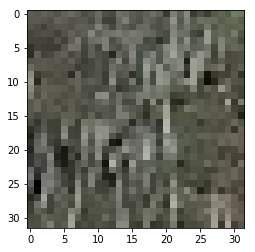

In [7]:
im= Image.open(train_path[0])
plt.imshow(im)

# PREPROCESSING IMAGE

In [0]:
X_train = [resize(plt.imread(train_path)) for train_path in train_path]
X_test = [resize(plt.imread(test_path)) for test_path in test_path]
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
def save_data(file, fileName):
  with open(fileName, 'wb') as f:
    pickle.dump(file,f)
  f.close()
def open_data(file):
  with open(file,'rb') as f:
    file = pickle.load(f)
  return file

In [0]:
save_data(X_train,"trainDf")
save_data(X_test,"testDf")

In [0]:
file_train = open_data("trainDf")
file_test = open_data("testDf")


In [63]:
labels.head(10)


,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
5,0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1
6,002134abf28af54575c18741b89dd2a4.jpg,0
7,0024320f43bdd490562246435af4f90b.jpg,0
8,002930423b9840e67e5a54afd4768a1e.jpg,1
9,00351838ebf6dff6e53056e00a1e307c.jpg,1


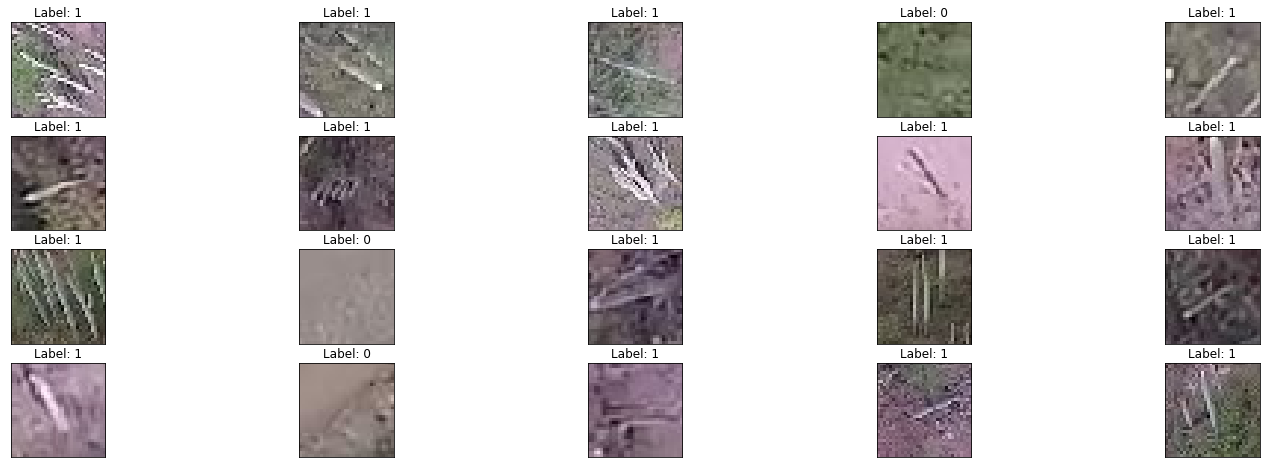

In [16]:
labels = pd.read_csv('train.csv')
fig = plt.figure(figsize= (25,8))
train_imgs = os.listdir('train/')
for index, img in enumerate(np.random.choice(train_imgs, 20)):
  ax = fig.add_subplot(4, 5, index+1, xticks =[], yticks =[])
  im = Image.open('train'+'/'+img)
  plt.imshow(im)
  lab = labels.loc[labels['id']== img,'has_cactus'].values[0]
  ax.set_title(f'Label: {lab}')

  

In [0]:
y = labels['has_cactus'].values

In [0]:
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, Dense

In [0]:
def build_model():
  model = Sequential()
  model.add(Conv2D(filters=64, input_shape=(32,32,3), kernel_size=(5,5), strides=, padding='same'))
  model.add(MaxPooling2D((2,2), strides=2))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(128, (3,3), strides=1, padding = 'valid'))
  model.add(MaxPooling2D((2,2), strides=2))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(256, (3,3), strides=(1,1), padding = 'valid'))
  model.add(MaxPooling2D((2,2), strides=2))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(512, (3,3), strides=(1,1), padding = 'valid'))
  model.add(MaxPooling2D((2,2), strides=2))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu',input_shape=(100*100*3,)))
  model.add(Dropout(0.4))
  model.add(Dense(128, activation = 'tanh',input_shape=(100*100*3,)))
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = 'sigmoid'))
  
  return model

In [33]:
model = build_model()
model.compile(loss= 'mse',
              optimizer = optimizers.adam(lr=0.001),
             metrics=['accuracy'])
model.fit(X_train,y, validation_split=0.2, batch_size = 64, epochs=50, verbose= 2)

Train on 14000 samples, validate on 3500 samples
Epoch 1/50


ResourceExhaustedError: ignored

In [0]:
import keras

In [0]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)
model.layers.pop()
for layer in model.layers:
  layer.trainable = False

# Flatten model
model.add(Flatten())

# Add dense layer
model.add(Dense(1, activation = 'softmax'))

In [0]:
adam = keras.optimizers.Adam(lr = 0.001)

In [50]:
model.compile(loss= 'binary_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
model.fit(X_train, y, validation_split=0.2, epochs=50, batch_size=256, verbose=2)

Train on 14000 samples, validate on 3500 samples
Epoch 1/50


InternalError: ignored